In [53]:
import numpy as np
import pandas as pd
import datetime as dt
from datetime import date

In [2]:
pd.set_option('display.float_format', '{:.2f}'.format)

In [3]:
data_frame = pd.read_excel("Dataset for ITM.xlsx")
data_frame['Start Date'] = pd.to_datetime(data_frame['Start Date'], errors='coerce')
data_frame['End Date'] = pd.to_datetime(data_frame['End Date'], errors='coerce')


Source: https://stackoverflow.com/questions/20461165/how-to-convert-index-of-a-pandas-dataframe-into-a-column

In [4]:
company_df = data_frame[["Name Of Awarded Company","Amount Awarded"]]
company_df["Name Of Awarded Company"] = company_df["Name Of Awarded Company"].str.upper()
company_df = company_df.groupby("Name Of Awarded Company")

grouped_company = company_df.sum().sort_values(by = "Amount Awarded", ascending = False)
grouped_company.reset_index(level = 0, inplace = True)
grouped_company.to_csv("Grouped Awarded Companies.csv",index = False)


/Users/donlim/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


source for replacing date: https://www.kite.com/python/examples/3011/datetime-replace-attributes-of-a-datetime

In [5]:
def start_date_replacer(df):
    remove_start_date = [2021,1920,2030,2010]
    if df['Start Date'].year in remove_start_date:
        return df['Start Date'].replace(year = 2020)
    else:
        return df['Start Date']
data_frame['Edited Start Date'] = data_frame.apply(start_date_replacer,axis = 1)

def end_date_replacer(df):
    remove_end_date = [2019,2018]
    if df['End Date'].year in remove_end_date:
        return df['End Date'].replace(year = 2020)
    else:
        return df['End Date']
data_frame['Edited End Date'] = data_frame.apply(end_date_replacer,axis = 1)

In [6]:
data_frame

,Project Name,Approved Budget,Start Date,End Date,Name Of Awarded Company,Amount Awarded,Date Of Award,Notice Of Award,Acceptance Date,Contract/PO,Annual Procurement Plan,Procuring Entity,Procuring Entity name,Unnamed: 13,Edited Start Date,Edited End Date
0,Supply and Delivery of Personal Protective Equ...,3846000000.00,2020-05-08,2020-06-07,Pharmally Pharmaceutical Corporation,3820000000.00,2020-05-06,../data/files/ac/15949874993904024825f1193ebd6...,2020-05-06,../data/files/ac/159498750015016656405f1193ec2...,../data/files/ac/159498750011565351955f1193ec7...,1445,PROCUREMENT SERVICE,PROCUREMENT SERVICE,2020-05-08,2020-06-07
1,Supply and Delivery of Testing Kits for COVID ...,2877300000.00,2020-06-09,2020-06-24,Pharmally Pharmaceutical Corporation,2877300000.00,2020-06-08,../data/files/ac/15949732707799151855f115c564e...,2020-06-08,../data/files/ac/15949732709850286115f115c569b...,../data/files/ac/159497327118205753725f115c570...,1396,Department of Labor and Employment Regional Of...,Procurement Service - DBM,2020-06-09,2020-06-24
2,SUPPLY AND DELIVERY OF PERSONAL PROTECTIVE EQU...,1923000000.00,2020-05-08,2020-06-07,XUZHOU CONSTRUCTION MACHINERY GROUP IMP. AND E...,1898000000.00,2020-05-07,../data/files/ac/15949950289145283895f11b15454...,2020-05-07,../data/files/ac/159499502815995931795f11b154c...,../data/files/ac/15949950297967714125f11b1552e...,1445,Department of Labor and Employment Regional Of...,PROCUREMENT SERVICE,2020-05-08,2020-06-07
3,Supply and Delivery of Personal Protective Equ...,790000000.00,2020-06-29,2020-08-13,Ferjan Healthlink Philippines Inc.,727500000.00,2020-06-19,../data/files/ac/159498448410818091545f118824c...,2020-06-19,../data/files/ac/15949844852346663925f1188252b...,../data/files/ac/159498448510225473205f1188257...,1445,Department of Labor and Employment Regional Of...,PROCUREMENT SERVICE,2020-06-29,2020-08-13
4,Supply and Delivery of Testing Kits for COVID ...,760000000.00,2020-04-24,2020-07-31,Pharmally Pharmaceutical Corporation,688000000.00,2020-04-23,../data/files/ac/15949732675678053535f115c53cd...,2020-04-23,../data/files/ac/159497326819689457175f115c541...,../data/files/ac/15949732687526970615f115c5475...,1396,Department of Labor and Employment Regional Of...,Procurement Service - DBM,2020-04-24,2020-07-31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11692,Production of Mailbox Disinfectant,267989.90,2020-03-31,2020-04-15,HVF CYCLE PARTS CENTER,50.00,2020-04-14,../data/files/ac/159489196115153663935f101eb9a...,2020-04-14,../data/files/ac/159489196117321960365f101eb9d...,../data/files/ac/15948919629218430745f101eba29...,907,Department of Labor and Employment Regional Of...,SOUTHERN LEYTE STATE UNIVERSITY,2020-03-31,2020-04-15
11693,Purchase of Face Materials for Face Shields Fa...,45940.00,2020-04-01,2020-04-14,Junnel's Dry Goods Store,50.00,2020-04-01,../data/files/ac/159529307013923402155f163d8ee...,2020-04-10,../data/files/ac/159529307112849599035f163d8f3...,../data/files/ac/159529307117375907875f163d8f8...,1218,Department of Labor and Employment Regional Of...,Philippine Science High School-Central Visayas...,2020-04-01,2020-04-14
11694,Production of Disinfectant Solution and Produc...,179735.57,2020-03-23,2020-04-07,ARIEL A. LUZON GENERAL MERCHANDISE,39.00,2020-04-07,../data/files/ac/159480991512221310015f0ede3b5...,2020-04-07,../data/files/ac/15948099151685701275f0ede3b9e...,../data/files/ac/159480991513823640605f0ede3bd...,907,Department of Labor and Employment Regional Of...,SOUTHERN LEYTE STATE UNIVERSITY,2020-03-23,2020-04-07
11695,Production of Disinfectant Solution and Produc...,179735.57,2020-03-23,2020-04-07,YANNIS HARDWARE,30.00,2020-04-02,../data/files/ac/1594809906680676795f0ede32077...,2020-04-02,../data/files/ac/1594809906573977415f0ede324ad...,../data/files/ac/159480990611082623295f0ede328...,907,Department of Labor and Employment Regional Of...,SOUTHERN LEYTE STATE UNIVERSITY,2020-03-23,2020-04-07


In [7]:
consolidated = data_frame.loc[:,["Name Of Awarded Company","Edited Start Date","Edited End Date"]]
# We assume that some dates are interchanged between the start and end thus the abs value
consolidated["Date Difference"] =  abs(consolidated["Edited End Date"] - consolidated["Edited Start Date"])


In [8]:
consolidated

,Name Of Awarded Company,Edited Start Date,Edited End Date,Date Difference
0,Pharmally Pharmaceutical Corporation,2020-05-08,2020-06-07,30 days
1,Pharmally Pharmaceutical Corporation,2020-06-09,2020-06-24,15 days
2,XUZHOU CONSTRUCTION MACHINERY GROUP IMP. AND E...,2020-05-08,2020-06-07,30 days
3,Ferjan Healthlink Philippines Inc.,2020-06-29,2020-08-13,45 days
4,Pharmally Pharmaceutical Corporation,2020-04-24,2020-07-31,98 days
...,...,...,...,...
11692,HVF CYCLE PARTS CENTER,2020-03-31,2020-04-15,15 days
11693,Junnel's Dry Goods Store,2020-04-01,2020-04-14,13 days
11694,ARIEL A. LUZON GENERAL MERCHANDISE,2020-03-23,2020-04-07,15 days
11695,YANNIS HARDWARE,2020-03-23,2020-04-07,15 days


In [9]:
consolidated["Date Difference"] = consolidated["Date Difference"].dt.days

In [10]:
sorted_date = consolidated.sort_values(by = "Date Difference", ascending = True).copy()

In [11]:
sorted_date.tail(50)

,Name Of Awarded Company,Edited Start Date,Edited End Date,Date Difference
2594,"Lifelink, Inc.",2020-05-15,2021-05-15,365
3520,"Getz Bros. Phils., Inc.",2020-04-16,2021-04-16,365
9661,Hanagail International Corp.,2020-04-18,2021-04-18,365
2593,LVM Food Supply,2020-06-18,2021-06-18,365
1827,C. Ortega General Merchandise,2020-06-18,2021-06-18,365
4231,C. Ortega General Merchandise,2020-06-18,2021-06-18,365
4837,Zuellig Pharma Corporation,2020-06-09,2021-06-09,365
1480,"Rebmann, Incorporated",2020-03-14,2021-03-14,365
1423,Goshen Medical Supplies,2020-04-25,2021-04-25,365
9649,"Euro-Med Laboratories Phi., Inc.",2020-04-13,2021-04-13,365


In [12]:
average_date_diff = sorted_date[["Name Of Awarded Company","Date Difference"]].groupby("Name Of Awarded Company").mean()
average_date_diff = average_date_diff.rename(columns = {"Date Difference":"Average Date Difference" })
average_date_diff.reset_index(level = 0, inplace = True)
average_date_diff = average_date_diff.sort_values(by = "Average Date Difference", ascending = True)



In [13]:
average_date_diff.to_csv("Average Date Difference.csv",index = False)

Source: https://www.datacamp.com/community/tutorials/joining-dataframes-pandas

In [14]:
grouped_company.head(20)

,Name Of Awarded Company,Amount Awarded
0,PHARMALLY PHARMACEUTICAL CORPORATION,7905146016.00
1,XUZHOU CONSTRUCTION MACHINERY GROUP IMP. AND E...,1898000000.00
2,FERJAN HEALTHLINK PHILIPPINES INC.,727500000.00
3,JV OF SUNWEST CONSTRUCTION AND DEVELOPMENT COR...,725672160.00
4,BIOSITE MEDICAL INSTRUMENTS,686874750.00
5,BV THREE TWO FOUR PRINTING AND TRADING,627619068.00
6,5MJ MARKETING,512897120.00
7,NIKKA TRADING,502959312.00
8,"MEDICAL TEST SYSTEMS, INC.",482530916.00
9,SL AGRITECH CORPORATION,455186932.40


In [15]:
merged_df = pd.merge(grouped_company,average_date_diff, on = "Name Of Awarded Company")

In [16]:
merged_df = merged_df.sort_values(by = "Amount Awarded",ascending = True)
merged_df['Amount Awarded'] = merged_df['Amount Awarded']/100000
merged_df = merged_df.rename(columns = {"Amount Awarded": "Amount Awarded (in hundred thousands)"})
merged_df.to_csv("Amount and Date Difference Relationship.csv",index = False)

To get spenditure of Procuring Entities

In [17]:
spenditure_df = data_frame.loc[:,["Procuring Entity","Edited Start Date","Amount Awarded"]]
spenditure_df.to_csv("Procuring Entity Spenditure.csv",index = False)







To get awarded companies to compare with Philgeps

In [49]:
philgeps_df = pd.read_csv("philgeps final.csv")
company_prof_list = philgeps_df[['Organization Name','Registration date']]
working_company_prof = company_prof_list.copy()

In [54]:
working_company_prof['Date today'] = date.today()

In [55]:
working_company_prof

,Organization Name,Registration date,Date today
0,AL CONSTRUCTION AND SUPPLY,27-Nov-2018,2020-08-19
1,SRF ENTERPRISES & GENERAL MERCHANDISE,15-Aug-2008,2020-08-19
2,WIZARD I.T. SYSTEMS CORPORATION,09-Mar-2016,2020-08-19
3,RBM ENTERPRISES,11-Aug-2005,2020-08-19
4,"PILOTAGE TRADING AND CONSTRUCTION, INC",11-Apr-2006,2020-08-19
...,...,...,...
13838,BV & EA MARKETING,01-Jun-2016,2020-08-19
13839,SANFORD MARKETING CORPORATION,08-Oct-2015,2020-08-19
13840,TITO MIKE'S PLACE,16-Dec-2014,2020-08-19
13841,"SUPERVALUE, INC.",04-Dec-2014,2020-08-19


In [59]:
working_company_prof['Registration date'] = pd.to_datetime(working_company_prof['Registration date'], errors='coerce')
working_company_prof['Date today'] = pd.to_datetime(working_company_prof['Date today'], errors='coerce')


In [60]:
working_company_prof["Company Age"] = working_company_prof.loc[:,"Date today"] - working_company_prof.loc[:,"Registration date"]
working_company_prof["Company Age"] = working_company_prof["Company Age"].dt.days/365



In [61]:
working_company_prof.sort_values(by = "Company Age", ascending = False)

,Organization Name,Registration date,Date today,Company Age
325,CFN REFRIGERATION AND AIR CONDITIONING SERVICES,1970-01-01,2020-08-19,50.67
3066,ASSAB STEELS SINGAPORE (PTE) LTD,1970-01-01,2020-08-19,50.67
6079,RJIR ENTERPRISES CORPORATION,1970-01-01,2020-08-19,50.67
4906,RELIANCE PRINTING CORPORATION,2000-12-14,2020-08-19,19.69
12037,NATION PAPER PRODUCTS AND PRINTING CORPORATION,2000-12-14,2020-08-19,19.69
...,...,...,...,...
353,FGBM CONSTRUCTION SERVICES,2020-08-06,2020-08-19,0.04
144,AFEW CONSTRUCTION,2020-08-06,2020-08-19,0.04
272,CASA FERNANDO BUILDERS AND DEVELOPER INC.,2020-08-06,2020-08-19,0.04
214,AZMON-BUILDERS AND SUPPLIES CORP.,2020-08-07,2020-08-19,0.03


In [62]:
len(grouped_company['Name Of Awarded Company'].unique())

5618

In [63]:
grouped_company['Name Of Awarded Company'] = grouped_company['Name Of Awarded Company'].str.upper()

In [64]:
collated_companies_df = pd.merge(left = grouped_company, right = working_company_prof, left_on = "Name Of Awarded Company", right_on = "Organization Name")

collated_companies_df

,Name Of Awarded Company,Amount Awarded,Organization Name,Registration date,Date today,Company Age
0,PHARMALLY PHARMACEUTICAL CORPORATION,7905146016.00,PHARMALLY PHARMACEUTICAL CORPORATION,2020-02-06,2020-08-19,0.53
1,BIOSITE MEDICAL INSTRUMENTS,686874750.00,BIOSITE MEDICAL INSTRUMENTS,2007-11-15,2020-08-19,12.77
2,BV THREE TWO FOUR PRINTING AND TRADING,627619068.00,BV THREE TWO FOUR PRINTING AND TRADING,2016-04-21,2020-08-19,4.33
3,5MJ MARKETING,512897120.00,5MJ MARKETING,2007-05-02,2020-08-19,13.31
4,SL AGRITECH CORPORATION,455186932.40,SL AGRITECH CORPORATION,2006-11-02,2020-08-19,13.81
...,...,...,...,...,...,...
899,STRENGTH HARDWARE ENTERPRISES,2032.00,STRENGTH HARDWARE ENTERPRISES,2017-01-10,2020-08-19,3.61
900,F. CASALME CONSTRUCTION & SUPPLY,1839.97,F. CASALME CONSTRUCTION & SUPPLY,2009-03-19,2020-08-19,11.43
901,GOROSPE GAS STATION,1635.00,GOROSPE GAS STATION,2017-07-24,2020-08-19,3.07
902,ALEX CHAN BAZAR,800.00,ALEX CHAN BAZAR,2008-04-01,2020-08-19,12.39


In [65]:
collated_companies_df = collated_companies_df[['Name Of Awarded Company','Amount Awarded','Company Age']].copy()
collated_companies_df['Amount Awarded'] = collated_companies_df["Amount Awarded"]/100000
collated_companies_df = collated_companies_df.rename(columns = {'Amount Awarded':'Amount Awarded (in hundred thousands)'}).copy()
collated_companies_df.to_csv("Relationship of Amount Awarded and Company Age.csv",index = False)



Get number of unique companies registered in philgeps list relative to unique awarded companies

In [66]:
unique_number_awarded_comp = grouped_company['Name Of Awarded Company'].count()
registered_companies_in_philgeps = collated_companies_df['Name Of Awarded Company'].count()

In [67]:
not_registered_in_philgeps = unique_number_awarded_comp - registered_companies_in_philgeps
print(registered_companies_in_philgeps)
print(not_registered_in_philgeps)
print(unique_number_awarded_comp)

904
4714
5618


In [73]:
top_companies = grouped_company.head(15)

In [74]:
top_companies

,Name Of Awarded Company,Amount Awarded
0,PHARMALLY PHARMACEUTICAL CORPORATION,7905146016.00
1,XUZHOU CONSTRUCTION MACHINERY GROUP IMP. AND E...,1898000000.00
2,FERJAN HEALTHLINK PHILIPPINES INC.,727500000.00
3,JV OF SUNWEST CONSTRUCTION AND DEVELOPMENT COR...,725672160.00
4,BIOSITE MEDICAL INSTRUMENTS,686874750.00
5,BV THREE TWO FOUR PRINTING AND TRADING,627619068.00
6,5MJ MARKETING,512897120.00
7,NIKKA TRADING,502959312.00
8,"MEDICAL TEST SYSTEMS, INC.",482530916.00
9,SL AGRITECH CORPORATION,455186932.40


In [70]:
collated_topcompanies_df = pd.merge(left = top_companies, right = working_company_prof, left_on = "Name Of Awarded Company", right_on = "Organization Name")


In [71]:
collated_topcompanies_df

,Name Of Awarded Company,Amount Awarded,Organization Name,Registration date,Date today,Company Age
0,PHARMALLY PHARMACEUTICAL CORPORATION,7905146016.00,PHARMALLY PHARMACEUTICAL CORPORATION,2020-02-06,2020-08-19,0.53
1,BIOSITE MEDICAL INSTRUMENTS,686874750.00,BIOSITE MEDICAL INSTRUMENTS,2007-11-15,2020-08-19,12.77
2,BV THREE TWO FOUR PRINTING AND TRADING,627619068.00,BV THREE TWO FOUR PRINTING AND TRADING,2016-04-21,2020-08-19,4.33
3,5MJ MARKETING,512897120.00,5MJ MARKETING,2007-05-02,2020-08-19,13.31
4,SL AGRITECH CORPORATION,455186932.40,SL AGRITECH CORPORATION,2006-11-02,2020-08-19,13.81
5,PHILIPPINE BLUE CROSS BIOTECH CORPORATION,432172825.00,PHILIPPINE BLUE CROSS BIOTECH CORPORATION,2002-04-24,2020-08-19,18.33


https://www.tutorialspoint.com/matplotlib/matplotlib_pie_chart.htm#:~:text=Matplotlib%20API%20has%20a%20pie,1%20%2D%20sum(x).

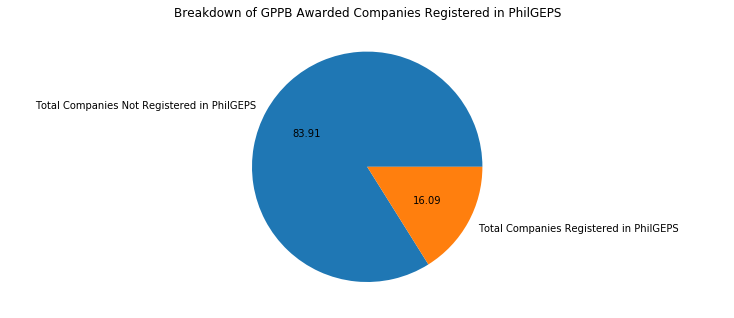

In [72]:
from matplotlib import pyplot as plt
fig = plt.figure(figsize = (10,4))
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
ax.title.set_text('Breakdown of GPPB Awarded Companies Registered in PhilGEPS')
companies = ['Total Companies Not Registered in PhilGEPS', 'Total Companies Registered in PhilGEPS']
number = [not_registered_in_philgeps,registered_companies_in_philgeps]
ax.pie(x = number, labels = companies,autopct='%.2f')
plt.savefig("Breakdown of GPPB Awarded Companies Registered in PhilGEPS")
plt.show()
